# Libary import

In [28]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing

In [43]:
df = pd.read_csv('../../documents_data.csv')

In [61]:
df['Date'] = pd.to_datetime(df['Date'].str.split().str[0], format='%Y-%m-%d')
df = df[df['Content'].notna()]

AttributeError: Can only use .str accessor with string values!

In [56]:
df.sort_values(by='Date', inplace=True)

In [57]:
df['Date']

37278   1980-07-17
37279   1981-03-30
37280   1981-03-31
37281   1981-03-31
37282   1981-04-02
           ...    
25513   2024-09-19
25509   2024-09-19
25508   2024-09-19
25510   2024-09-19
25514   2024-09-19
Name: Date, Length: 67337, dtype: datetime64[ns]

In [58]:
df.head()

,Title,Date,Content,Citation,President,Categories,Attributes,Location,Link
37278,Ambassador Bush's Informal Remarks to the New ...,1980-07-17,Just a few minutes before he appeared at the c...,"George Bush, Ambassador Bush's Informal Remark...",George Bush,"Vice Presidential Candidates, Elections and Tr...","Campaign Remarks & Rallies, , LocationMichigan",Michigan,https://www.presidency.ucsb.edu/documents/amba...
37279,Statement by the Vice President About the Atte...,1981-03-30,"Well, I have a very brief statement that I wou...","George Bush, Statement by the Vice President A...",George Bush,"Vice Presidential, Remarks by the Vice Preside...","Vice Presidents, Watch Video, LocationWashingt...","Washington, DC",https://www.presidency.ucsb.edu/documents/stat...
37280,Exchange Between the Vice President and Report...,1981-03-31,The Vice President. The medical reports were v...,"George Bush, Exchange Between the Vice Preside...",George Bush,"Vice Presidential, Remarks by the Vice Preside...","Vice Presidents, , LocationWashington, DC","Washington, DC",https://www.presidency.ucsb.edu/documents/exch...
37281,Remarks of the Vice President and Prime Minist...,1981-03-31,The Vice President. We've just had a delightfu...,"George Bush, Remarks of the Vice President and...",George Bush,"Vice Presidential, Remarks by the Vice Preside...","Vice Presidents, , LocationWashington, DC","Washington, DC",https://www.presidency.ucsb.edu/documents/rema...
37282,Remarks of the Vice President and Deputy Prime...,1981-04-02,"The Vice President. Well, let me say that we'v...","George Bush, Remarks of the Vice President and...",George Bush,"Vice Presidential, Remarks by the Vice Preside...","Vice Presidents, , LocationWashington, DC","Washington, DC",https://www.presidency.ucsb.edu/documents/rema...


# Regex based matching

In [89]:
# miu_phrases = [
#     "made in usa", "made in america", "made in u.s.", "made in us",
#     "american made", "usa made", "u.s. made", "us made",
#     "buy american", "buy usa", "buy america",
#     "support america", "support usa", "support u.s.",
#     "patriot*",
#     "choose american", "choose usa", "choose u.s.", "choose america",
#     "national pride",
#     "usa based", "america based", "american based", "us based", "u.s. based",
#     "usa produced", "america produced", "american produced", "us produced", "u.s. produced",
#     "usa manufactured", "america manufactured", "american manufactured", "us manufactured", "u.s. manufactured",
#     "american worker*", "american job*",
#     "veteran* owned", "veteran* founded", "founded by veteran*",
#     "handcrafted in america", "handcrafted in usa", "handcrafted in u.s.", "handcrafted in us",
#     "crafted in america", "crafted in usa", "crafted in u.s.", "crafted in us",
#     "america* heritage", "america* tradition", "america* value",
#     "icon of america*", "icon of usa", "icon of u.s.",
#     "america* manufactur*", "u.s. manufactur*"
# ]

miu_phrases = [
    r"\bmade in usa\b", r"\bmade in america\b", r"\bmade in u\.s\.\b", r"\bmade in us\b",
    r"\bamerican made\b", r"\busa made\b", r"\bu\.s\. made\b", r"\bus made\b",
    r"\bbuy american\b", r"\bbuy usa\b", r"\bbuy america\b",
    r"\bsupport america\b", r"\bsupport usa\b", r"\bsupport u\.s\.\b",
    r"\bpatriot\w*\b",  # Matches "patriot", "patriotic", etc.
    r"\bchoose american\b", r"\bchoose usa\b", r"\bchoose u\.s\.\b", r"\bchoose america\b",
    r"\bnational pride\b",
    r"\busa based\b", r"\bamerica based\b", r"\bamerican based\b", r"\bus based\b", r"\bu\.s\. based\b",
    r"\busa produced\b", r"\bamerica produced\b", r"\bamerican produced\b", r"\bus produced\b", r"\bu\.s\. produced\b",
    r"\busa manufactured\b", r"\bamerica manufactured\b", r"\bamerican manufactured\b", r"\bus manufactured\b", r"\bu\.s\. manufactured\b",
    r"\bamerican worker\w*\b", r"\bamerican job\w*\b",
    r"\bveteran\w* owned\b", r"\bveteran\w* founded\b", r"\bfounded by veteran\w*\b",
    r"\bhandcrafted in america\b", r"\bhandcrafted in usa\b", r"\bhandcrafted in u\.s\.\b", r"\bhandcrafted in us\b",
    r"\bcrafted in america\b", r"\bcrafted in usa\b", r"\bcrafted in u\.s\.\b", r"\bcrafted in us\b",
    r"\bamerica\w* heritage\b", r"\bamerica\w* tradition\b", r"\bamerica\w* value\b",
    r"\bicon of america\w*\b", r"\bicon of usa\b", r"\bicon of u\.s\.\b",
    r"\bamerica\w* manufactur\w*\b", r"\bu\.s\. manufactur\w*\b"
]

In [90]:
# Convert wildcard phrases (* to match any characters) into regex patterns
# miu_phrases_regex = [re.sub(r'\*', r'.*', phrase) for phrase in miu_phrases]

# Create a regex pattern by joining all phrases
# miu_regex = re.compile('|'.join(miu_phrases_regex), re.IGNORECASE)

# Create a regex pattern by joining all phrases
miu_regex = re.compile('|'.join(miu_phrases), re.IGNORECASE)

# Function to count matches in 'Content' column
df['matches'] = df['Content'].apply(lambda x: len(miu_regex.findall(x)))

# Create a 'Month' column to group by month
df['Month'] = df['Date'].dt.to_period('M')

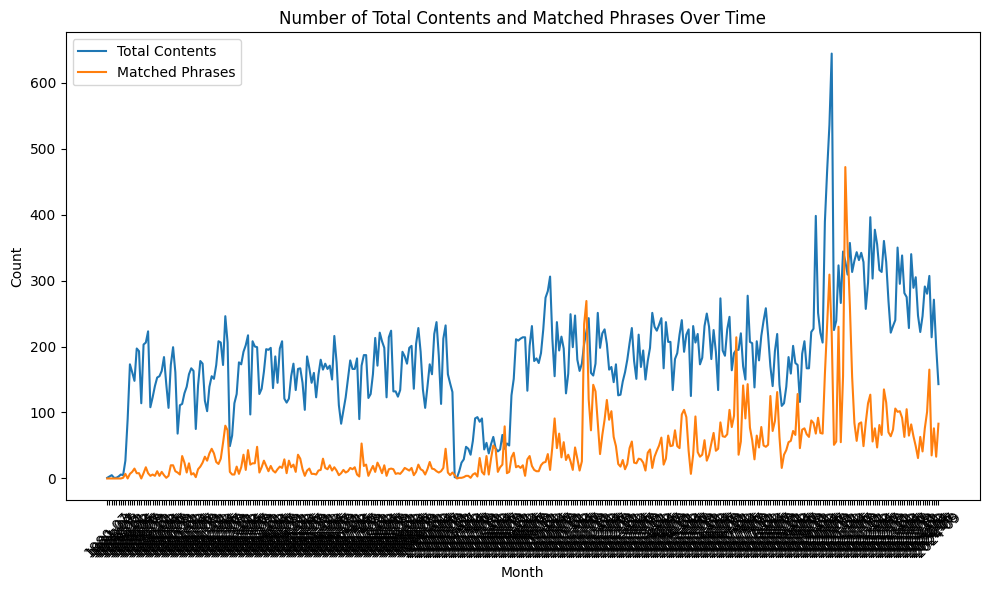

In [91]:
# Group by month and calculate the total contents and matched phrases
monthly_stats = df.groupby('Month').agg(
    total_contents=('Content', 'size'),
    matched_phrases=('matches', 'sum')
).reset_index()

# Plot the results as a line chart without dots at every point
plt.figure(figsize=(10, 6))
plt.plot(monthly_stats['Month'].astype(str), monthly_stats['total_contents'], label='Total Contents')
plt.plot(monthly_stats['Month'].astype(str), monthly_stats['matched_phrases'], label='Matched Phrases')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Total Contents and Matched Phrases Over Time')
plt.legend()
plt.tight_layout()
plt.show()


In [108]:
n = 50

# Find the top 3 months with the highest total_contents
top_total_contents = monthly_stats.nlargest(n, 'total_contents')

# Find the top 3 months with the highest matched_phrases
top_matched_phrases = monthly_stats.nlargest(n, 'matched_phrases')

# Display the results
print(f"Top {n} months by total contents:")
print(top_total_contents[['Month', 'total_contents']])

print(f"\nTop {n} months by matched phrases:")
print(top_matched_phrases[['Month', 'matched_phrases']])


Top 50 months by total contents:
       Month  total_contents
319  2020-10             644
318  2020-09             536
317  2020-08             467
312  2020-03             398
336  2022-03             396
316  2020-07             389
338  2022-05             377
342  2022-09             360
327  2021-06             357
339  2022-06             355
348  2023-03             350
324  2021-03             344
330  2021-09             343
332  2021-11             342
354  2023-09             340
350  2023-05             338
331  2021-10             331
329  2021-08             330
325  2021-04             329
333  2021-12             328
343  2022-10             328
322  2021-01             323
340  2022-07             316
328  2021-07             313
341  2022-08             313
326  2021-05             309
362  2024-05             307
195  2010-06             306
356  2023-11             305
337  2022-04             303
335  2022-02             297
349  2023-04             295
360  2024-

In [104]:
# Function to find and return the matched phrases from the Content
def find_matched_phrases(text, pattern):
    return pattern.findall(text)

# Apply the function to extract matched phrases for each row
df['matched_phrases_list'] = df['Content'].apply(lambda x: find_matched_phrases(x, miu_regex))

In [105]:
# Get rows with matched phrases (where 'matches' > 0)
matched_phrases_df = df[df['matches'] > 10]

# Get rows with no matched phrases (where 'matches' == 0)
not_matched_phrases_df = df[df['matches'] == 0]

# Show examples of matched phrases
print("Examples of Matched Phrases:")
print(matched_phrases_df[['Date', 'Content', 'matched_phrases_list']].head(5))  # Display first 5 examples

# Show examples of not matched phrases
print("\nExamples of Not Matched Phrases:")
print(not_matched_phrases_df[['Date', 'Content']].head(5))  # Display first 5 examples


Examples of Matched Phrases:
            Date                                            Content  \
41081 1991-02-15  Listen, I came up here to thank you guys, but ...   
60265 1997-09-11  By the authority vested in me as President by ...   
26076 2008-05-14  Earlier today, I went for a tour of the Chrysl...   
26079 2008-05-14  At Macomb Community College, Obama outlines pl...   
26151 2008-06-30  On a spring morning in April of 1775, a simple...   

                                    matched_phrases_list  
41081  [Patriot, Patriot, Patriot, patriots, American...  
60265  [American Heritage, American Heritage, America...  
26076  [American workers, American manufacturing, Ame...  
26079  [American workers, American manufacturing, Ame...  
26151  [patriots, patriotism, patriotism, patriot, pa...  

Examples of Not Matched Phrases:
            Date                                            Content
37278 1980-07-17  Just a few minutes before he appeared at the c...
37279 1981-03-30  We

In [106]:
print(matched_phrases_df.iloc[1][['Content', 'matched_phrases_list']])

Content                 By the authority vested in me as President by ...
matched_phrases_list    [American Heritage, American Heritage, America...
Name: 60265, dtype: object


In [107]:
print(matched_phrases_df.iloc[4]['Content'])
print(matched_phrases_df.iloc[4]['matched_phrases_list'])

On a spring morning in April of 1775, a simple band of colonists – farmers and merchants, blacksmiths and printers, men and boys – left their homes and families in Lexington and Concord to take up arms against the tyranny of an Empire. The odds against them were long and the risks enormous – for even if they survived the battle, any ultimate failure would bring charges of treason, and death by hanging.
And yet they took that chance. They did so not on behalf of a particular tribe or lineage, but on behalf of a larger idea. The idea of liberty. The idea of God-given, inalienable rights. And with the first shot of that fateful day – a shot heard round the world – the American Revolution, and America's experiment with democracy, began.
Those men of Lexington and Concord were among our first patriots. And at the beginning of a week when we celebrate the birth of our nation, I think it is fitting to pause for a moment and reflect on the meaning of patriotism – theirs, and ours. We do so in 

In [117]:
# Filter for rows in April 2021 with more than 10 matched phrases
april_2021_df = df[(df['Month'] == '2021-04') & (df['matches'] > 5)]

# Show examples of documents in April 2021 with matched phrases
print("Documents from April 2021 with matched phrases (more than 10 matches):")
print(april_2021_df[['Date', 'Content', 'matched_phrases_list']])  # Display all relevant columns


Documents from April 2021 with matched phrases (more than 10 matches):
            Date                                            Content  \
13314 2021-04-01  Following yesterday's announcement of the Amer...   
13308 2021-04-01  Pool Reports by Natasha Korecki , POLITICO\nSe...   
13319 2021-04-01  James S. Brady Press Briefing Room\n1:44 P.M. ...   
13332 2021-04-02  James S. Brady Press Briefing Room\n12:33 P.M....   
13352 2021-04-06  James S. Brady Press Briefing Room\n12:15 P.M....   
13363 2021-04-07  James S. Brady Press Briefing Room\n**See corr...   
13372 2021-04-08  James S. Brady Press Briefing Room\n12:44 P.M....   
13379 2021-04-09  New York Times columnist and Nobel Prize winni...   
13387 2021-04-09  James S. Brady Press Briefing Room\n12:33 P.M....   
13405 2021-04-12  The President. Well, look, the reason I'm here...   
13417 2021-04-13  As we emerge from the pandemic, 10 million are...   
13415 2021-04-13  Today, the Columbus Dispatch published an op-e...   
13416 

In [118]:
print(april_2021_df.iloc[10]['Content'])
print(april_2021_df.iloc[10]['matched_phrases_list'])

As we emerge from the pandemic, 10 million are still unemployed. The American Jobs Plan will create blue-collar jobs. For those who need training, President Biden's plan will provide it.
Throughout our nation's history, often in times of war or economic crisis, critical investments have driven much-needed job creation — leaving both our nation's infrastructure and our nation's workforce stronger.
When President Abraham Lincoln started construction on the transcontinental railroad during the Civil War, to connect the East Coast to the West, jobs opened up for blacksmiths and carpenters. When President Herbert Hoover started construction on the Hoover Dam during the Great Depression, to generate power for multiple states, unemployed workers flocked to Nevada to join the team.
As we emerge from the pandemic, at least 10 million Americans are still unemployed — many worked in lower-wage jobs and more than 4 million have been out of work for more than 27 weeks.
Recently, President Joe Biden